# (Prosper Loan Data Exploration)
## by (Ahmed ElSotohy)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data [dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000) explains the variables in the data set

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)
df.head(3)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [3]:
columns = ['BorrowerAPR', 'StatedMonthlyIncome', 'EmploymentStatus', 'LoanOriginalAmount', 'Term', 
           'ProsperRating (Alpha)', 'IncomeRange', 'EmploymentStatusDuration']
sub = df[columns]
sub.head()

,BorrowerAPR,StatedMonthlyIncome,EmploymentStatus,LoanOriginalAmount,Term,ProsperRating (Alpha),IncomeRange,EmploymentStatusDuration
0,0.16516,3083.333333,Self-employed,9425,36,NaN,"$25,000-49,999",2.0
1,0.12016,6125.000000,Employed,10000,36,A,"$50,000-74,999",44.0
2,0.28269,2083.333333,Not available,3001,36,NaN,Not displayed,NaN
3,0.12528,2875.000000,Employed,10000,36,A,"$25,000-49,999",113.0
4,0.24614,9583.333333,Employed,15000,36,D,"$100,000+",44.0


In [4]:
sub.describe()

,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount,Term,EmploymentStatusDuration
count,113912.000000,1.139370e+05,113937.00000,113937.000000,106312.000000
mean,0.218828,5.608026e+03,8337.01385,40.830248,96.071582
std,0.080364,7.478497e+03,6245.80058,10.436212,94.480605
min,0.006530,0.000000e+00,1000.00000,12.000000,0.000000
25%,0.156290,3.200333e+03,4000.00000,36.000000,26.000000
50%,0.209760,4.666667e+03,6500.00000,36.000000,67.000000
75%,0.283810,6.825000e+03,12000.00000,36.000000,137.000000
max,0.512290,1.750003e+06,35000.00000,60.000000,755.000000


### What is the structure of your dataset?

> The data set consists of 113937 row, and 81 columns (features) such as BorrowerAPR, StatedMonthlyIncome, EmploymentStatus, LoanOriginalAmount, Term, ProsperRating (Alpha), IncomeRange, EmploymentStatusDuration, etc.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is borrower's Annual Percentage Rate (APR). We'll to see what factors could help predict borrower's APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'd expect that loan amount, loan term, monthly income, and prosper rating may have a big factor in borrower's APR.

In [5]:
sub.isna().sum()['BorrowerAPR']

25

In [6]:
sub = sub[~sub.BorrowerAPR.isna()]
sub.isna().sum()['BorrowerAPR']

0

In [7]:
sub.head(3)

,BorrowerAPR,StatedMonthlyIncome,EmploymentStatus,LoanOriginalAmount,Term,ProsperRating (Alpha),IncomeRange,EmploymentStatusDuration
0,0.16516,3083.333333,Self-employed,9425,36,NaN,"$25,000-49,999",2.0
1,0.12016,6125.000000,Employed,10000,36,A,"$50,000-74,999",44.0
2,0.28269,2083.333333,Not available,3001,36,NaN,Not displayed,NaN


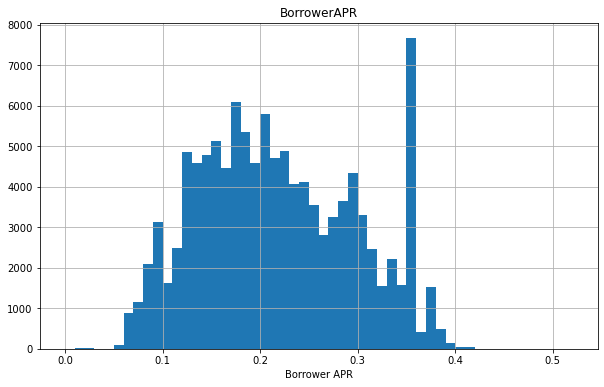

In [8]:
bins = np.arange(0, sub.BorrowerAPR.max()+0.01, 0.01)
sub.hist('BorrowerAPR', bins = bins, figsize= [10, 6]);
plt.xlabel('Borrower APR');

BorrowerAPR's distiribution looks multimodal with small, medium, and large peaks. The highest peak is between 0.35, and 0.36 APR.

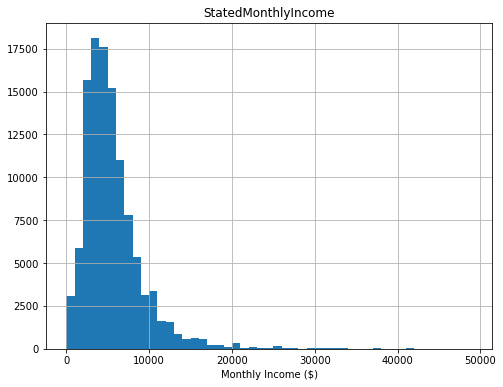

In [9]:
bins = np.arange(0, 50000, 1000)
sub.hist('StatedMonthlyIncome', bins = bins, figsize= [8, 6]);
plt.xlabel('Monthly Income ($)');

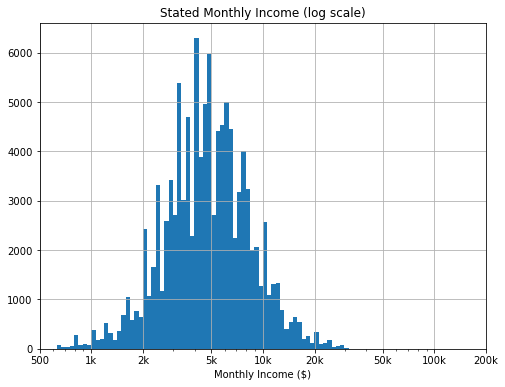

In [30]:
#We'll be plotting the above distribution on a log scale due to it having a long tail
bins = 10 ** np.arange(2.8, np.log10(sub['StatedMonthlyIncome'].max())+0.025, 0.025)
sub.hist('StatedMonthlyIncome', bins = bins, figsize= [8, 6]);
plt.xscale('log')
xticks = [500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5]
plt.xticks(xticks, [500, '1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k'])
plt.xlabel('Monthly Income ($)');
plt.title('Stated Monthly Income (log scale)');

In [11]:
#Let's check borrowers who earn more than 100k monthly
sub[sub.StatedMonthlyIncome>100000]

,BorrowerAPR,StatedMonthlyIncome,EmploymentStatus,LoanOriginalAmount,Term,ProsperRating (Alpha),IncomeRange,EmploymentStatusDuration
8066,0.35643,4.166667e+05,Employed,2000,36,HR,"$100,000+",183.0
8870,0.12700,2.083333e+05,Not available,12500,36,NaN,Not displayed,NaN
17411,0.35643,4.833333e+05,Employed,7500,36,E,"$100,000+",121.0
35218,0.07389,1.083333e+05,Full-time,1000,36,AA,"$100,000+",233.0
45028,0.33973,1.500000e+05,Self-employed,4000,36,E,"$100,000+",97.0
53014,0.25785,6.185478e+05,Self-employed,4000,12,D,"$100,000+",117.0
53167,0.35797,1.750003e+06,Self-employed,4000,36,HR,"$100,000+",114.0
56867,0.11144,1.850818e+05,Self-employed,25000,36,NaN,"$100,000+",8.0
57133,0.35643,4.666667e+05,Employed,4000,36,E,"$100,000+",271.0
59298,0.24246,1.208333e+05,Self-employed,15000,36,C,"$100,000+",91.0


In [12]:
#Now let's check percentage of borrower's that earn more than 30k a month
round((sub['StatedMonthlyIncome']>30000).sum()/sub.shape[0], 3)

0.003

Monthly income looks right skewed, with most borrower's earning less than 30k a month, and only 3% earning more than 30k. However, we have a few borrowers that earns a lot more than 100k a month, and are only taking loans around 5k. We'll consider them as outliers and drop the 3% earning more than 30k a month to better interpret our data.

In [13]:
#Removing data with monthly income more than 30k a month
sub = sub[sub['StatedMonthlyIncome']<=30000]
(sub.StatedMonthlyIncome>3e4).sum()

0

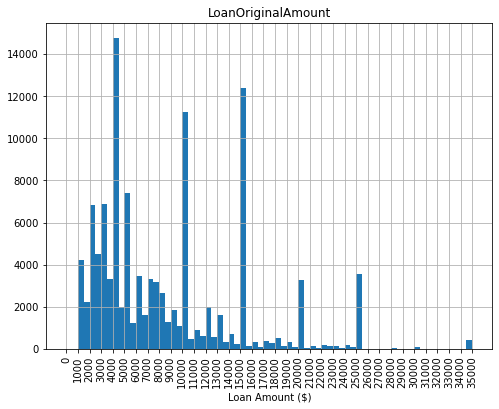

In [14]:
bins = np.arange(0, sub.LoanOriginalAmount.max()+500, 500)
sub.hist('LoanOriginalAmount', bins = bins, figsize= [8, 6]);
xticks = np.arange(0, sub.LoanOriginalAmount.max()+1000, 1000)
plt.xticks(xticks, xticks, rotation = 90)
plt.xlabel('Loan Amount ($)');

Loan amount distribution also looks multimodal with the largest peak between 4,000 - 5,000. Other peaks are observed with 5k increments at 10k, 15k, 20k, and 25k.

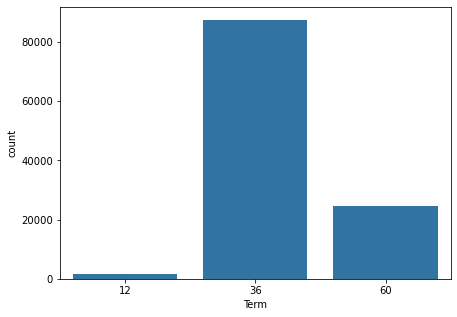

In [15]:
plt.figure(figsize= [7, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = sub, x = 'Term', color = base_color);

The majority of loan erms are 36 months, and 60 months. Only a small portion were 12 months.

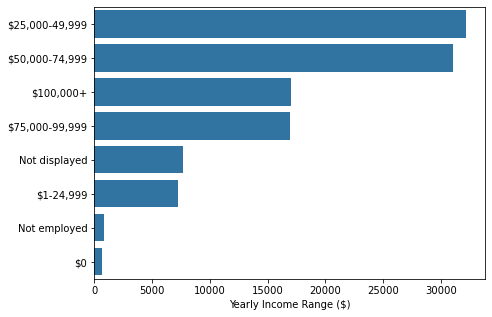

In [16]:
plt.figure(figsize= [7, 5])
sns.countplot(data = sub, y = 'IncomeRange', color = base_color, order = sub['IncomeRange'].value_counts().index);
plt.xlabel('Yearly Income Range ($)');
plt.ylabel('');

We can see that majority of yearly income range is between $25,000 - $100,000.

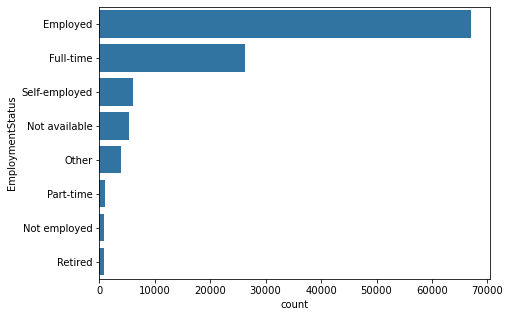

In [17]:
plt.figure(figsize= [7, 5])
sns.countplot(data = sub, y = 'EmploymentStatus', color = base_color, order = sub['EmploymentStatus'].value_counts().index);

Majority of borrowers are either Employed, or Full-time. Let's check employment duration

In [18]:
#Ordering Prosper Rating, income range and employment status as ordered categorical types
prosper_rating = ['AA','A','B','C','D', 'E', 'HR'] # High to low rating
p_rating = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rating)
income_range = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                '$75,000-99,999', '$100,000+', 'Not displayed' ]
income_order = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
emp_status = ['Not employed','Employed', 'Full-time', 'Part-time', 'Self-employed', 'Other', 'Retired',  'Not available']
emp_order  = pd.api.types.CategoricalDtype(ordered = True, categories = emp_status)

sub['ProsperRating (Alpha)'] = sub['ProsperRating (Alpha)'].astype(p_rating)
sub['IncomeRange'] = sub['IncomeRange'].astype(income_order)
sub['EmploymentStatus'] = sub['EmploymentStatus'].astype(emp_order)
sub.head()

,BorrowerAPR,StatedMonthlyIncome,EmploymentStatus,LoanOriginalAmount,Term,ProsperRating (Alpha),IncomeRange,EmploymentStatusDuration
0,0.16516,3083.333333,Self-employed,9425,36,NaN,"$25,000-49,999",2.0
1,0.12016,6125.000000,Employed,10000,36,A,"$50,000-74,999",44.0
2,0.28269,2083.333333,Not available,3001,36,NaN,Not displayed,NaN
3,0.12528,2875.000000,Employed,10000,36,A,"$25,000-49,999",113.0
4,0.24614,9583.333333,Employed,15000,36,D,"$100,000+",44.0


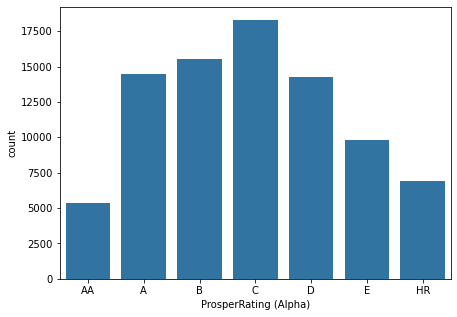

In [19]:
plt.figure(figsize= [7, 5])
sns.countplot(data = sub, x = 'ProsperRating (Alpha)', color = base_color);

It seems that most ratings are between A and D, with AA (best rating) being the least.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of BorrowerAPR is multimodal with most values between 0.05 - 0.4. No unusual points seen, and no transformations performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distributions observed.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [20]:
sub_nums = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'EmploymentStatusDuration']
sub_cat = ['EmploymentStatus', 'IncomeRange', 'Term', 'ProsperRating (Alpha)']

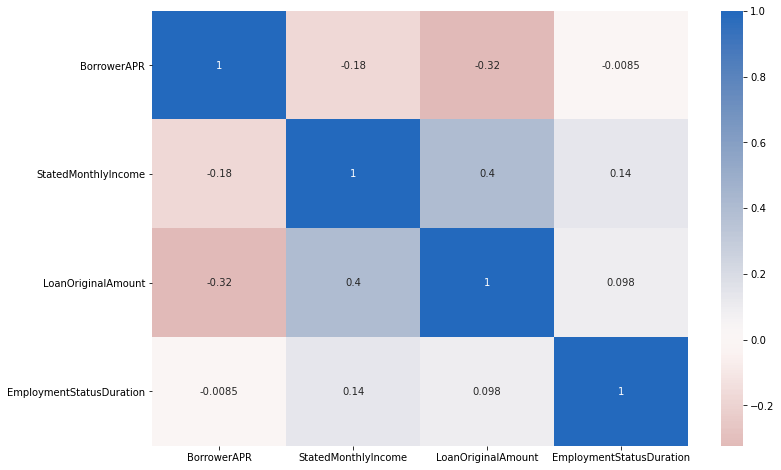

In [21]:
plt.figure(figsize= [12, 8])
sns.heatmap(sub[sub_nums].corr(), center = 0, cmap = 'vlag_r', annot = True);

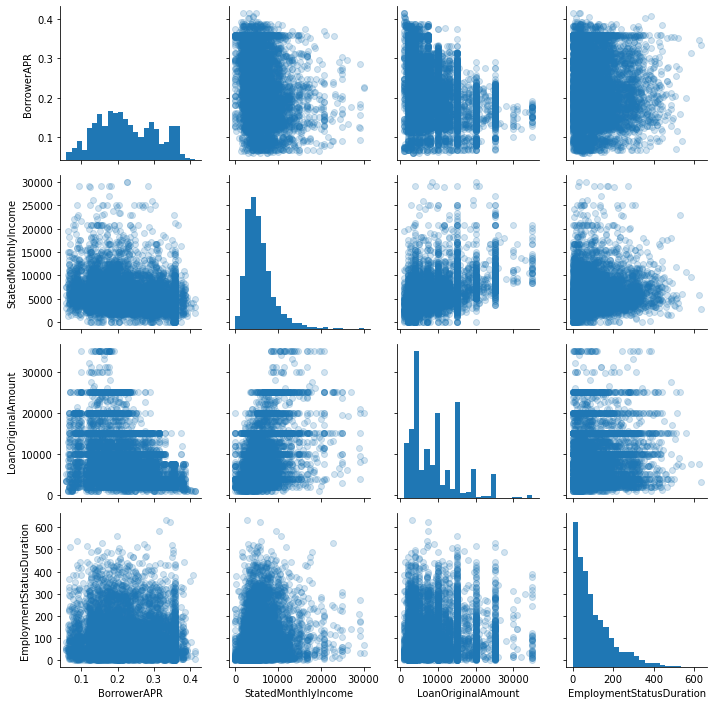

In [22]:
#Plotting a sample of 10k for a clearer plot
sample = sub.sample(10000)
g = sns.PairGrid(data = sample.dropna(), vars = sub_nums)
g.map_diag(plt.hist, bins = 25)
g.map_offdiag(plt.scatter, alpha = 0.2);

There's a moderate negative relationship between BorrowerAPR and loan amount, and a positive moderate relationship between monthly income, and loan amount.

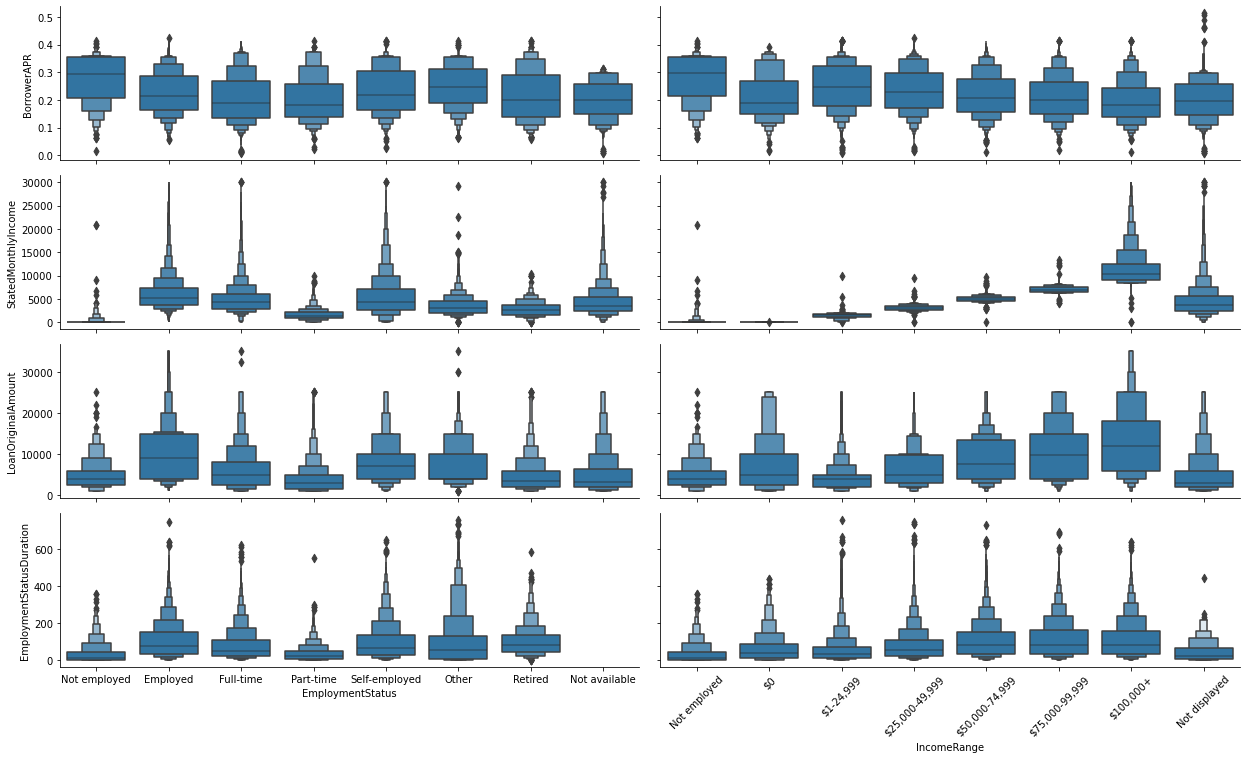

In [23]:
#Let's plot our 4 categorical variables against numerical variables.
g = sns.PairGrid(data = sub, y_vars = sub_nums, x_vars = sub_cat[:2], aspect = 3.5)
g.map(sns.boxenplot, color = base_color);
plt.xticks(rotation = 45);

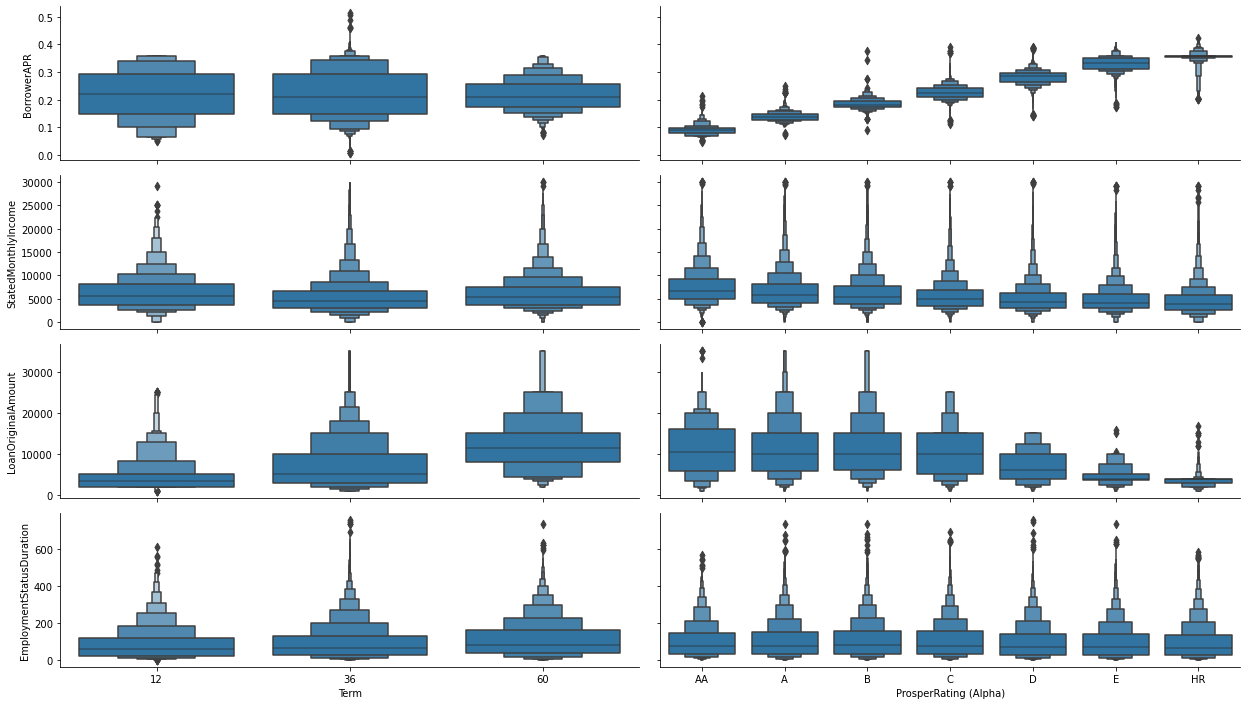

In [24]:
g = sns.PairGrid(data = sub, y_vars = sub_nums, x_vars = sub_cat[2:], aspect = 3.5)
g.map(sns.boxenplot, color = base_color);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We've observed that borrower APR decreases when with better prosper rating. Also, those who aren't employed, and who earned between $1 - $24,999 had the highest borrower APR respectively. APR also goes down with increased income range at up to +$100,000.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Those who are employed tends to borrow more money that those who aren't when compared to other employment statuses. We can also see more income range the borrower is, the more they borrow money, same thing is with prosper rating, as with better ratings, loan amounts go up. Also, with increasing loan term, loan amount goes up.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

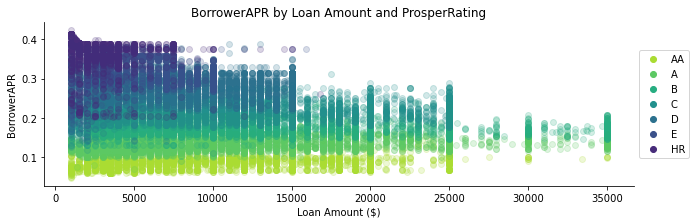

In [25]:
#We'll explore BorrowerAPR, LoanOriginalAmount, and ProsperRating.
g = sns.FacetGrid(data = sub, hue = 'ProsperRating (Alpha)', palette = 'viridis_r', aspect = 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha = 1/5);
leg = plt.legend(bbox_to_anchor = [1, 0.5], loc = 6);
for lh in leg.legendHandles:
   lh.set_alpha(1)
plt.title('BorrowerAPR by Loan Amount and ProsperRating');
plt.xlabel('Loan Amount ($)');

We can observe that BorrowerAPR decreases with better ProsperRating, and also those with better ProsperRating borrows more money. The opposite can be clearly observed for for borrowers with low ProsperRating as they tend to have a high BorrowerAPR, and are borrowing less money.

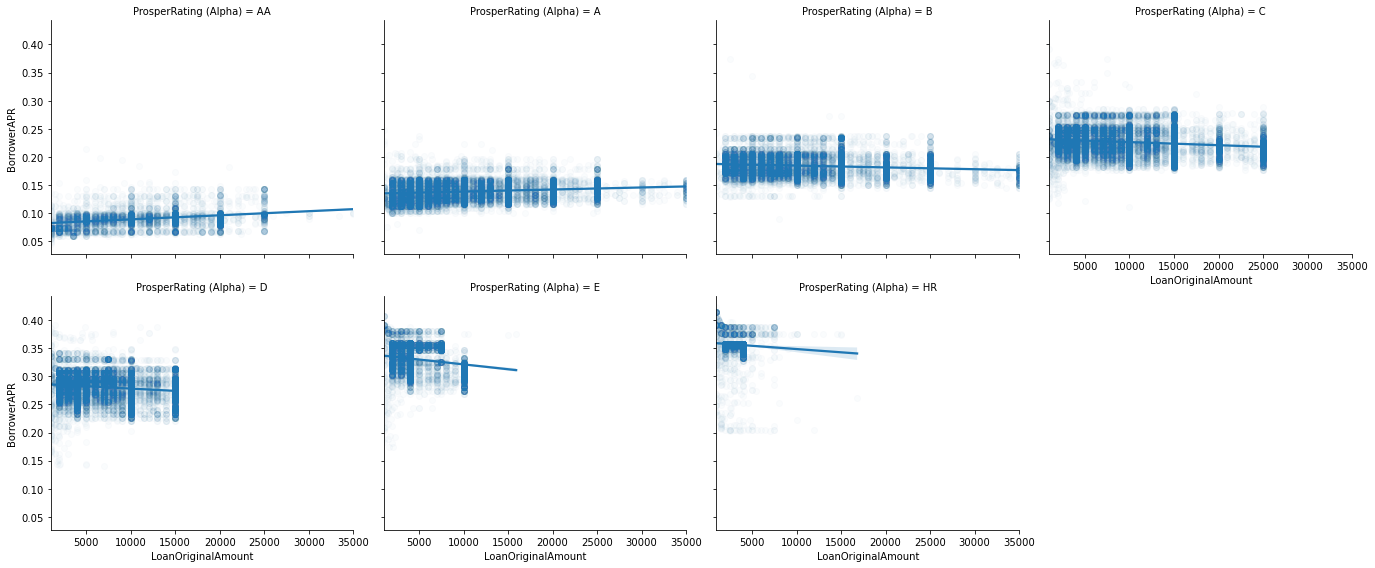

In [26]:
#Let's facit on ProsperRating across BorrowerAPR and LoanOriginalAmount
g = sns.FacetGrid(data = sub, col = 'ProsperRating (Alpha)', col_wrap = 4, aspect = 1.2, height = 4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws = {'alpha' : 0.02}, x_jitter = 0.3);

From the regression plot above we can observe something very interesting. From ProsperRating HR till B, BorrowerAPR decreases when LoanOriginalAmount increases. However, The opposite is happening at ProsperRating A & AA as BorrowerAPR increases slightly when LoanOriginalAmount increases. 

Now let's facet across Term.

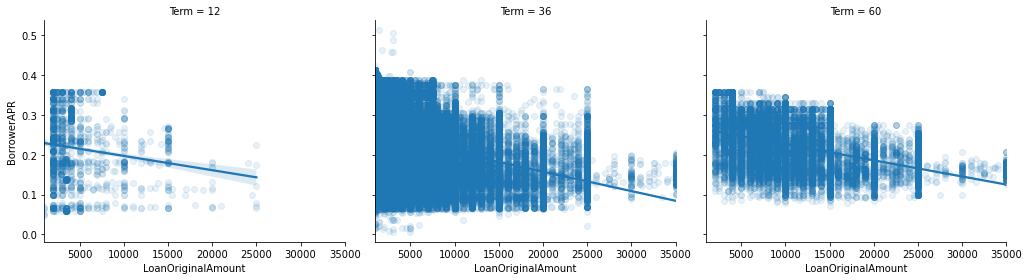

In [27]:
#Let's facit on ProsperRating across BorrowerAPR and LoanOriginalAmount
g = sns.FacetGrid(data = sub, col = 'Term', aspect = 1.2, height = 4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws = {'alpha' : 0.1}, x_jitter = 0.3);

Term doesn't seem to have much of a relationship between borrowerAPR and LoanOriginalAmount.

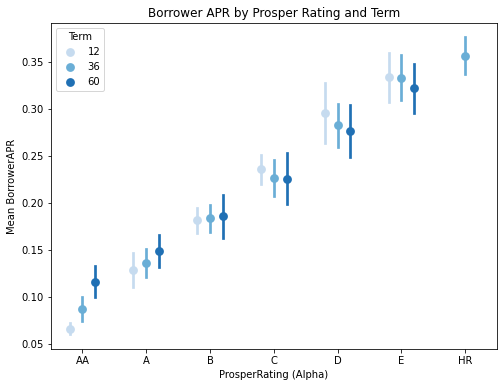

In [28]:
plt.figure(figsize = [8, 6])

sns.pointplot(data = sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
              linestyles='', palette = 'Blues', dodge = 0.4, ci = 'sd')
plt.ylabel('Mean BorrowerAPR')
plt.title('Borrower APR by Prosper Rating and Term');

We can see that Borrower APR decreases with higher Terms, however that's only from ProsperRating HR till C, as from B till AA, the longer the Term, the higher the BorrowerAPR.

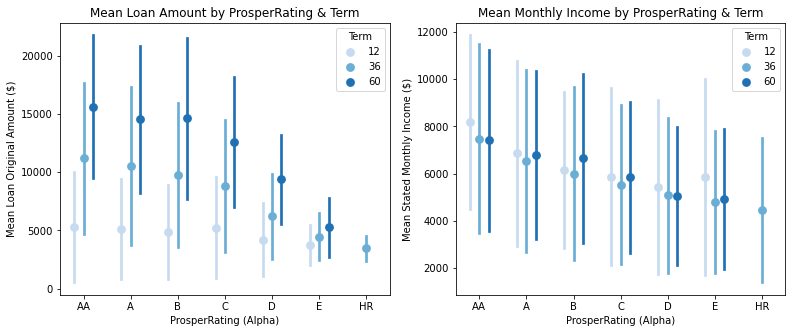

In [29]:
fig, ax = plt.subplots(1, 2, figsize = [13, 5])

a = sns.pointplot(data = sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
              linestyles='', palette = 'Blues', dodge = 0.4, ci = 'sd', ax = ax[0])
a.set_ylabel('Mean Loan Original Amount ($)')
a.set_title('Mean Loan Amount by ProsperRating & Term')
b = sns.pointplot(data = sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
              linestyles='', palette = 'Blues', dodge = 0.4, ci = 'sd', ax = ax[1])
b.set_ylabel('Mean Stated Monthly Income ($)');
b.set_title('Mean Monthly Income by ProsperRating & Term');

We can see that Loan Original Amount increases with the loan's term across all ProsperRatings. Also, there doesn't seem to be a noticeable relationship between ProsperRating, Stated Monthly Income, and Term.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We came to conclude that BorrowerAPR decreases with ProsperRating, and Loan Original Amount increases with ProsperRating. Also, on average, Loan Original Amount increases with longer payment terms.

### Were there any interesting or surprising interactions between features?

> With longer payment terms, on average, BorrowerAPR increases from ProsperRating B till AA.